## **Task 8: Тепловая карта (heatmap)**

Несколько упражнений назад мы хотели выявить закономерности в поведении пользователей во время рабочих и выходных дней. В этом упражнении давайте выясним, существуют ли закономерности в поведении пользователей в разные дни недели и часы.

    1.Анализируйте только пользователей, а не администраторов.
    2.Используйте фильтр status = 'ready' для коммитов.
    3.Разрешается выбрать цветовую палитру по своему вкусу для обоих графиков, которые вы построите в этом упражнении.
    4.Используйте таблицу checker для вашего запроса.
    5.Используйте абсолютные исходные, а не средние значения числа коммитов.
    6.Отсортируйте датафреймы по общему числу коммитов, сделанных пользователем.
    7.В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопросы (ответьте на них, глядя только на графики):
        «У какого пользователя больше всего коммитов во вторник?». Ответ: user_*.
        «У какого пользователя больше всего коммитов в четверг?». Ответ: user_*.
        «В какой будний день пользователи не любят делать много коммитов?». Ответ (в качестве примера): понедельник.
        «Какой пользователь в каком часу сделал наибольшее количество коммитов?». Ответ (в качестве примера): user_1, 15.
    8.Выполните необходимые шаги по созданию следующих двух графиков:

In [177]:
import pandas as pd
from sqlite3 import connect
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [178]:
from google.colab import drive
drive.mount('/content/drive')

In [179]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [180]:
#path = 'C:/Users/ipinguin/Documents/Edu/School21/ds-11/'
#file = 'data/checking-logs.sqlite'

#con = connect(path+file)

In [181]:
#Выборка данных из таблицы checker
sql = '''
      SELECT uid, timestamp FROM checker 
      WHERE uid like "user_%"
      and status = "ready"
      '''

In [182]:
checker = pd.read_sql(sql, con, parse_dates = 'timestamp')
checker

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:45.549397
2,user_4,2020-04-17 05:34:24.422370
3,user_4,2020-04-17 05:43:27.773992
4,user_4,2020-04-17 05:46:32.275104
...,...,...
1681,user_19,2020-05-21 20:01:48.959966
1682,user_1,2020-05-21 20:18:54.487900
1683,user_1,2020-05-21 20:19:06.872761
1684,user_1,2020-05-21 20:22:41.877806


In [183]:
#Создадим два списка значений для часов и дней
checker['hour'] = checker['timestamp'].dt.hour
checker['weekday'] = checker['timestamp'].dt.day_name()
print(checker.hour)

0        5
1        5
2        5
3        5
4        5
        ..
1681    20
1682    20
1683    20
1684    20
1685    20
Name: hour, Length: 1686, dtype: int64


In [184]:
hours = checker.hour.unique()
hours.sort()
print(hours)

[ 0  1  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [185]:
checker.loc[len(checker.index)] = ['NaN','NaN',2,'NaN']
checker.loc[len(checker.index)] = ['NaN','NaN',4,'NaN']
hours = checker.hour.unique()
hours.sort()
print(hours)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [186]:
#Сгруппируем данные по часам и пользователям
commit = checker \
            .groupby(['uid', 'hour'], as_index=False)\
            .agg({'timestamp': 'count'})\
            .pivot(index='uid', columns='hour', values='timestamp')

In [187]:
commit['total'] = commit.sum(axis=1)

In [188]:
#Отсортируем данные
commit = commit.sort_values('total', ascending=False).drop(columns='total').transpose().fillna(0)
commit.sort_index(inplace=True)

In [189]:
commit.drop(columns='NaN', inplace=True)
commit.columns

Index(['user_4', 'user_14', 'user_2', 'user_25', 'user_19', 'user_26',
       'user_20', 'user_31', 'user_3', 'user_10', 'user_29', 'user_28',
       'user_13', 'user_24', 'user_12', 'user_8', 'user_1', 'user_21',
       'user_30', 'user_18', 'user_17', 'user_16', 'user_27', 'user_15',
       'user_6', 'user_22', 'user_11', 'user_7', 'user_23', 'user_0'],
      dtype='object', name='uid')

In [190]:
# Датафрейм для второго графика
commit

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_3,user_10,...,user_17,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,3.0,0.0,0.0,6.0,1.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [191]:
#Сгруппируем данные по дням недели и пользователям
weekday = checker \
                .groupby(['uid', 'weekday'], as_index=False)\
                .agg({'timestamp': 'count'})\
                .pivot(index='uid', columns='weekday', values='timestamp')


In [192]:
weekday['total'] = weekday.sum(axis=1)

In [193]:
#Отсортируем данные
days_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = weekday.sort_values('total', ascending=False).drop(columns='total').transpose().fillna(0).reindex(days_week)

# Датафрейм для первого графика
weekday

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_3,user_10,...,user_16,user_27,user_15,user_6,user_22,user_11,user_7,user_23,user_0,NaN
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,18.0,25.0,12.0,8.0,4.0,0.0,12.0,3.0,23.0,0.0,...,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0
Tuesday,43.0,44.0,67.0,22.0,5.0,1.0,0.0,0.0,6.0,9.0,...,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0
Wednesday,17.0,0.0,16.0,8.0,0.0,17.0,4.0,0.0,0.0,19.0,...,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0
Thursday,54.0,9.0,2.0,20.0,40.0,26.0,48.0,5.0,5.0,38.0,...,7.0,8.0,3.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0
Friday,32.0,0.0,0.0,6.0,5.0,1.0,4.0,18.0,30.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,41.0,17.0,33.0,11.0,10.0,2.0,45.0,2.0,3.0,...,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,24.0,13.0,7.0,23.0,26.0,35.0,16.0,4.0,5.0,1.0,...,16.0,15.0,11.0,5.0,1.0,5.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='uid', ylabel='weekday'>

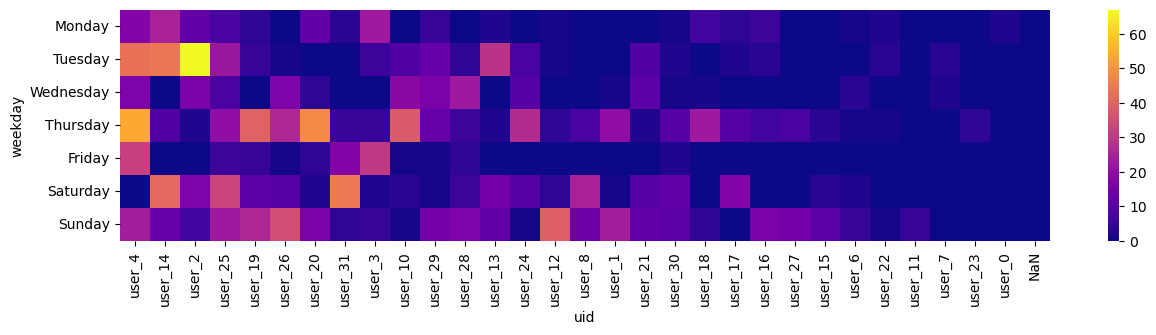

In [194]:
#Хитмап по дням недели
fig, ax = plt.subplots(figsize=(15, 3))

sns.heatmap(weekday, ax=ax, cmap='plasma')

<AxesSubplot:xlabel='uid', ylabel='hour'>

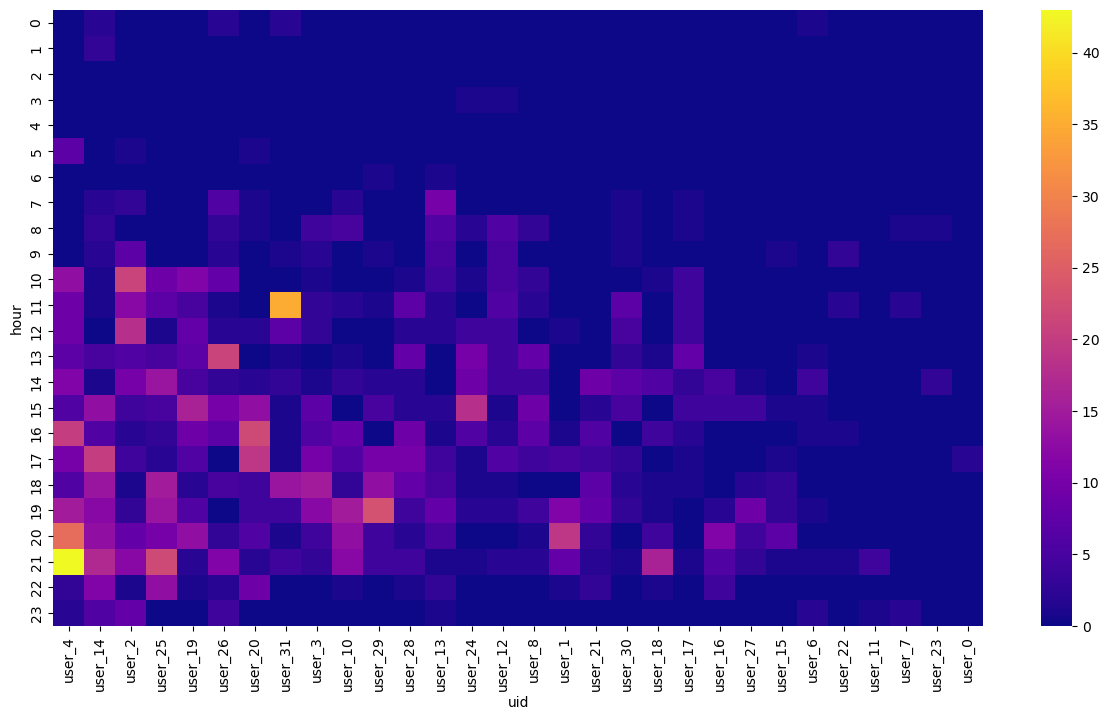

In [195]:
#Хитмап по часам
fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(commit, ax=ax, cmap='plasma')

In [196]:
con.close()

<code>__«У какого пользователя больше всего коммитов во вторник?»
    __«Ответ: user_2»__
    
</code>

<code>__«У какого пользователя больше всего коммитов в четверг?»
    __«Ответ: user_4»__
    
</code>

<code>__«В какой будний день пользователи не любят делать много коммитов?»
    __«Ответ: пятница»__
    
</code>

<code>__«Какой пользователь в каком часу сделал наибольшее количество коммитов?»
    __«Ответ: user_4, 21»__
    
</code>